# California_hosuing_data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Loading The data

In [2]:
from sklearn.datasets import fetch_california_housing

# Load the California Housing Prices dataset
california_housing = fetch_california_housing()
data = california_housing.data
target = california_housing.target

# Convert to a Pandas DataFrame
df = pd.DataFrame(data, columns=california_housing.feature_names)
df['target'] = target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
from scipy import stats

# Data Cleaning

In [6]:
# Identify missing values
missing_values = df.isnull().sum()

# Impute missing values using mean for numerical features
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Identify outliers using Z-Score and remove them
z_scores = np.abs(stats.zscore(df))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Normalize numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_no_outliers[df.columns[:-1]] = scaler.fit_transform(df_no_outliers[df.columns[:-1]])


/var/folders/8v/cmf3zm1j19q729mqzcz63d480000gn/T/ipykernel_1444/3486883157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[df.columns[:-1]] = scaler.fit_transform(df_no_outliers[df.columns[:-1]])


# Data Exploration

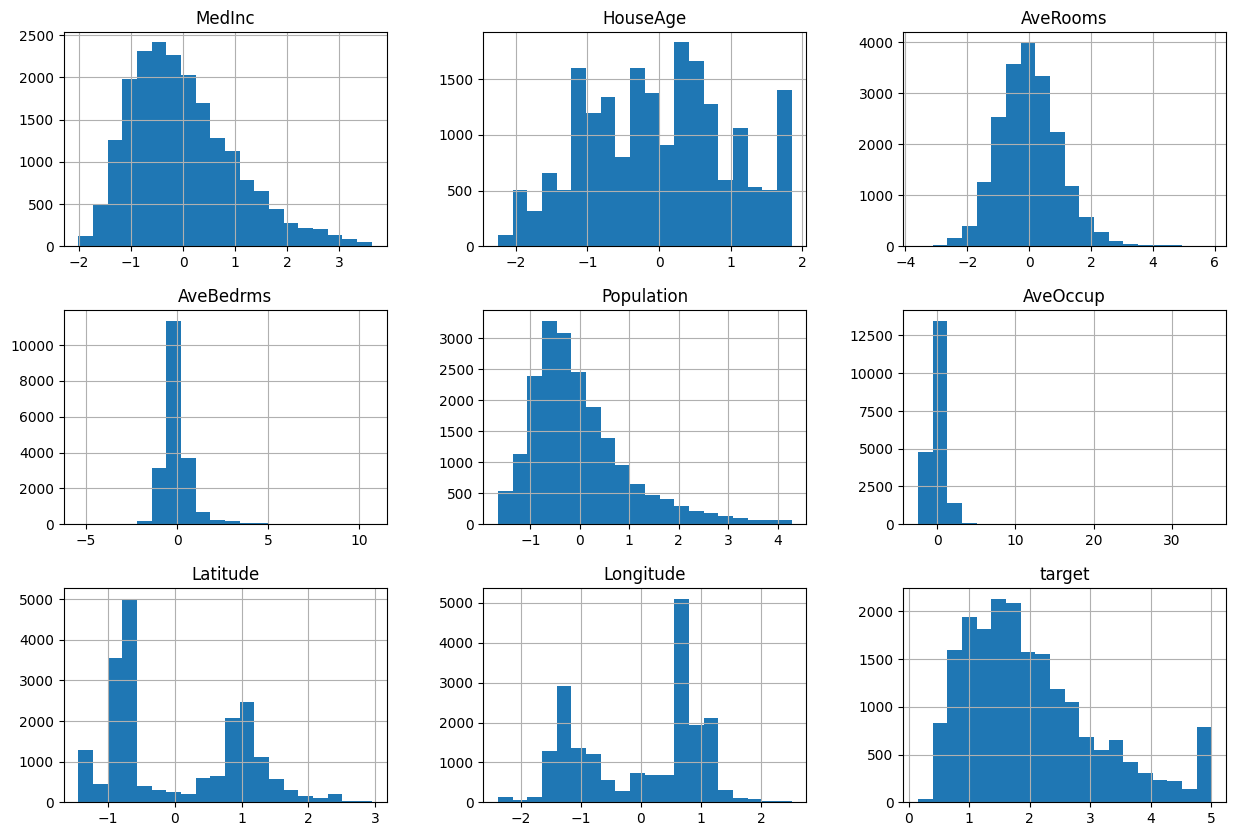

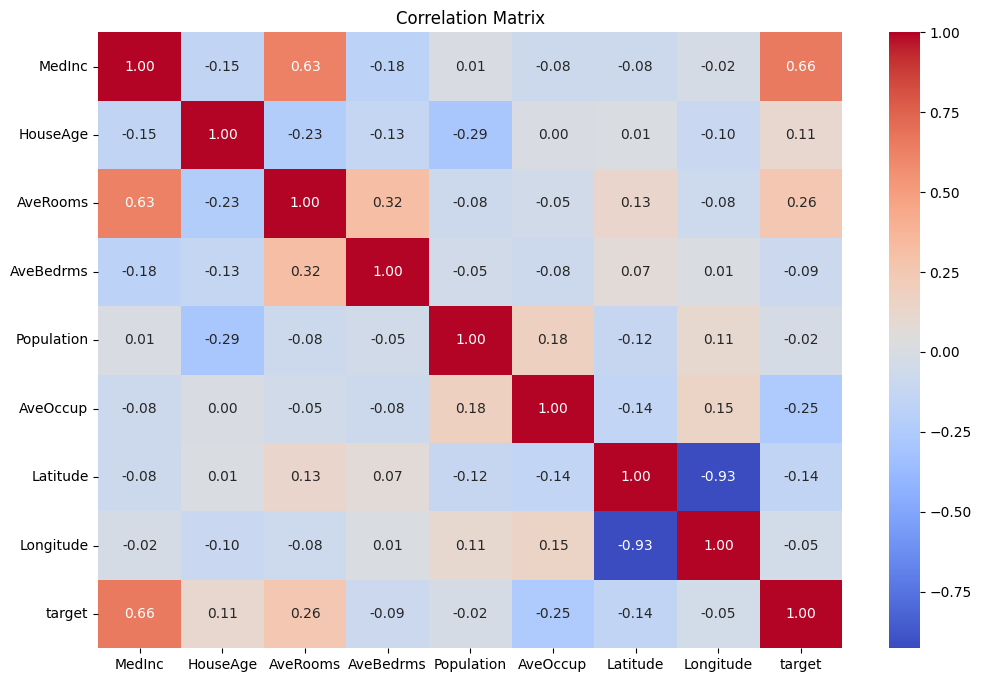

<Figure size 1500x1000 with 0 Axes>

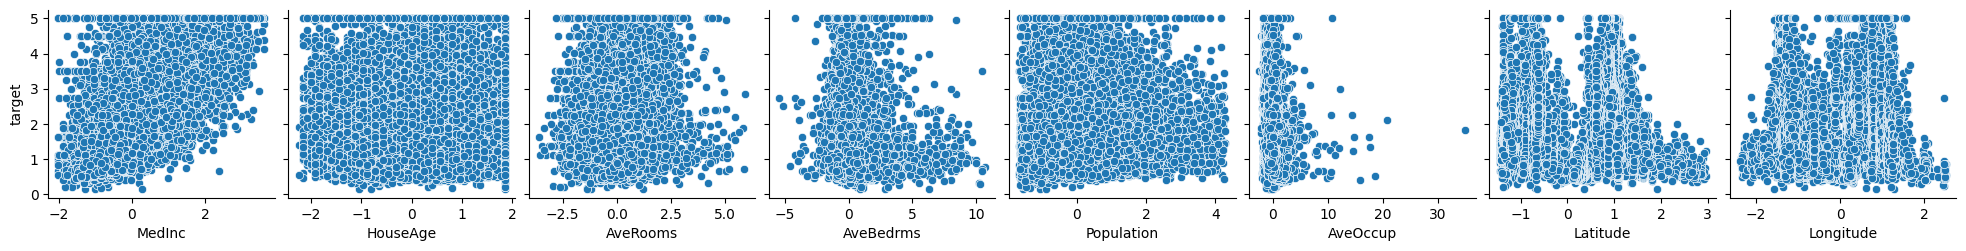

In [7]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Plot distributions for numerical features
df_no_outliers.hist(bins=20, figsize=(15, 10))
plt.show()

# Plot correlations using a heatmap
correlation_matrix = df_no_outliers.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Identify patterns using scatter plots
plt.figure(figsize=(15, 10))
sns.pairplot(df_no_outliers, x_vars=df_no_outliers.columns[:-1], y_vars=['target'])
plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Feature Engineering

In [9]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Feature engineering

# Create new feature: Rooms per Household
df['RoomsPerHousehold'] = df['AveRooms'] / df['HouseAge']




In [10]:
# Log transformation for skewed features
skewed_features = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
df[skewed_features] = np.log1p(df[skewed_features])

# Standardize numerical features (optional but can be beneficial for some models)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Drop unnecessary columns (if any)
# Example: Drop Latitude and Longitude if not needed for your analysis
df = df.drop(['Latitude', 'Longitude'], axis=1)

# Ensure the target variable is the last column
df = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'RoomsPerHousehold', 'target']]

# Display the modified DataFrame
print(df.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0  1.995505  0.982143  1.072436  -0.256650   -1.694943 -0.400594   
1  1.988380 -0.607019  0.649505  -0.503251    1.030337 -1.046006   
2  1.656444  1.856182  1.724704  -0.026779   -1.109604 -0.077335   
3  1.049948  1.856182  0.391271  -0.028550   -0.949925 -0.410919   
4  0.170631  1.856182  0.675467   0.008089   -0.933021 -0.936282   

   RoomsPerHousehold  target  
0           0.170345   4.526  
1           0.297054   3.585  
2           0.159387   3.521  
3           0.111872   3.413  
4           0.120805   3.422  


# Model Selection

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, accuracy_score

X = df.drop('target', axis=1)  # Features
y = df['target'] 
# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} Mean Squared Error: {mse}")



Linear Regression Mean Squared Error: 0.5855740157718886
Decision Tree Regressor Mean Squared Error: 0.8384581900824128


# Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Regression Models
param_grid_regression = {
    'Linear Regression': {},
    'Decision Tree Regressor': {'max_depth': [None, 5, 10, 15]}
}

for name, model in regression_models.items():
    grid_search = GridSearchCV(model, param_grid=param_grid_regression[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} Best Parameters: {best_params}")
    print(f"{name} Mean Squared Error (after tuning): {mse}")


Linear Regression Best Parameters: {}
Linear Regression Mean Squared Error (after tuning): 0.5855740157718886
Decision Tree Regressor Best Parameters: {'max_depth': 5}
Decision Tree Regressor Mean Squared Error (after tuning): 0.5364546300247232


In [13]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Models
decision_tree_regressor_model = DecisionTreeRegressor()

decision_tree_regressor_model.fit(X_train, y_train)

# Save Decision Tree Regressor model
with open('Decision_Tree_Regressor_model.pkl', 'wb') as file:
    pickle.dump(decision_tree_regressor_model, file)


decision_tree_predictions = decision_tree_regressor_model.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
print(f"Decision Tree Regressor Mean Squared Error: {decision_tree_mse}")




Decision Tree Regressor Mean Squared Error: 0.8370022434544573


#  Pickle Files

In [14]:
# Features during training: 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'
# Model expects 7 features, so adjust the sample input accordingly

# Create a sample input with 7 features
adjusted_sample_input = np.array([[4.5, 30, 5, 1, 1000, 3, -122.4]])

# Predict using the loaded model
with open('Decision_Tree_Regressor_model.pkl', 'rb') as file:
    loaded_decision_tree_regressor_model = pickle.load(file)

# Make prediction using the predict method
decision_tree_prediction = loaded_decision_tree_regressor_model.predict(adjusted_sample_input)

print(f"Decision Tree Regressor Prediction: {decision_tree_prediction[0]}")


Decision Tree Regressor Prediction: 1.375


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
